In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
train  = pd.read_csv('../data_set/train.csv')

In [320]:
train.head()

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price,address
0,e3mMIMR3JJqCaXz1,8,21,18674,4,3,2,6271,2,NaN,...,1,157,1,2483,1,6011,1,34.469803,6.476038e+05,213343132
1,LgwzgklNvy4QCtq5,8,7,18800,5,1,2,7885,2,NaN,...,1,115,1,15872,1,32221,1,40.073573,3.321452e+06,7180921
2,ucIR2NLLsC3T650L,8,7,19289,4,1,2,6028,2,NaN,...,1,212,1,15760,1,32228,1,54.462081,9.570885e+06,71801544
3,jre1pJhcQj91Kdky,8,21,20385,24,0,2,18325,0,NaN,...,1,125,1,2568,1,7271,1,99.628966,1.421501e+07,213433350
4,rQpYpY9nRG7X5mmr,1,21,20657,2,4,2,6880,2,NaN,...,1,47,1,2587,1,7442,1,124.131236,7.627120e+05,2110263


# 打亂數據之後抽取出test_set

In [321]:
#train = train.sample(frac=1)
#test = train.iloc[50000:,:]
#train = train.iloc[:50000,:]

# 觀察資料test_set

In [322]:
#train.head()

In [323]:
#test.head()

# 觀察資料型態

In [324]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 236 entries, building_id to address
dtypes: float64(35), int64(200), object(1)
memory usage: 108.0+ MB


In [325]:
train.describe()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,...,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price,address
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,3103.000000,1.393500e+04,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.0,60000.000000,6.000000e+04,6.000000e+04
mean,7.267917,11.414533,19488.957917,7.638250,1.931817,2.319200,11050.437183,1.585700,7.211837,5.025058e+04,...,0.995800,252.823100,0.999867,5276.668033,1.0,16474.836600,1.0,101.044751,1.293727e+07,5.616432e+07
std,2.170741,4.751677,727.331019,5.070314,1.589972,1.399528,4344.018090,0.778952,20.453902,3.973488e+04,...,0.064672,322.694074,0.011546,3856.219059,0.0,8998.020659,0.0,80.216061,5.522463e+07,6.374519e+07
min,1.000000,3.000000,18112.000000,1.000000,0.000000,0.000000,123.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,19.000000,1.0,30.000000,1.0,0.064766,2.261495e+05,6.304000e+03
25%,8.000000,7.000000,18892.750000,4.000000,0.000000,2.000000,7186.000000,2.000000,3.738412,2.827238e+04,...,1.000000,88.000000,1.000000,2672.000000,1.0,8859.000000,1.0,49.182384,2.433114e+06,7.196527e+06
50%,8.000000,12.000000,19527.000000,5.000000,1.000000,2.000000,11507.000000,2.000000,5.758023,4.379195e+04,...,1.000000,154.000000,1.000000,3942.000000,1.0,14344.000000,1.0,83.216237,5.240482e+06,1.417486e+07
75%,8.000000,13.000000,20125.000000,12.000000,4.000000,2.000000,14519.000000,2.000000,7.180619,6.148857e+04,...,1.000000,275.000000,1.000000,6647.000000,1.0,23459.250000,1.0,130.779416,1.123932e+07,1.013912e+08
max,11.000000,21.000000,20665.000000,29.000000,4.000000,10.000000,20577.000000,2.000000,967.370868,1.020404e+06,...,1.000000,3463.000000,1.000000,18268.000000,1.0,32908.000000,1.0,1106.382478,5.088279e+09,2.134334e+08


# 檢查是否存在遺漏值

In [326]:
nacol = set(train.columns) - set(train.dropna(axis=1).columns)

In [327]:
nacol

{'parking_area', 'parking_price', 'txn_floor', 'village_income_median'}

# 可以下列特徵存在遺漏值

## {'parking_area', 'parking_price', 'txn_floor', 'village_income_median'}


# 分別針對各個遺漏值分析

# parking_area 

In [328]:
train['parking_area'].describe()

count    3103.000000
mean        7.211837
std        20.453902
min         0.000000
25%         3.738412
50%         5.758023
75%         7.180619
max       967.370868
Name: parking_area, dtype: float64

## 顯示50000筆資料中 只有2597筆資料非遺漏值

## 此情況會選擇刪除整個特徵

In [329]:
train = train.drop('parking_area',axis=1)

# parking_price

In [330]:
train['parking_price'].describe()

count    1.393500e+04
mean     5.025058e+04
std      3.973488e+04
min      0.000000e+00
25%      2.827238e+04
50%      4.379195e+04
75%      6.148857e+04
max      1.020404e+06
Name: parking_price, dtype: float64

## 顯示50000筆資料中 有116450筆資料非遺漏值

## 畫hist plot 觀察

C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.2839e+04, 9.1400e+02, 1.7700e+02, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([      0.    ,  102040.3987,  204080.7974,  306121.1961,
         408161.5948,  510201.9935,  612242.3922,  714282.7909,
         816323.1896,  918363.5883, 1020403.987 ]),
 <a list of 10 Patch objects>)

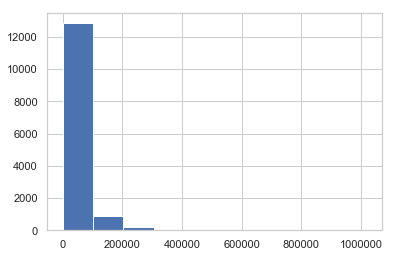

In [331]:
plt.hist(train['parking_price'])

## 暫時先使用，我們推斷parking_price 為遺漏值應該是沒有停車位導致，所以我們以0填入

In [332]:
train["parking_price"] = train["parking_price"].fillna(0)

In [333]:
train['parking_price'].describe()

count    6.000000e+04
mean     1.167070e+04
std      2.858202e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.020404e+06
Name: parking_price, dtype: float64

(array([5.8904e+04, 9.1400e+02, 1.7700e+02, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([      0.    ,  102040.3987,  204080.7974,  306121.1961,
         408161.5948,  510201.9935,  612242.3922,  714282.7909,
         816323.1896,  918363.5883, 1020403.987 ]),
 <a list of 10 Patch objects>)

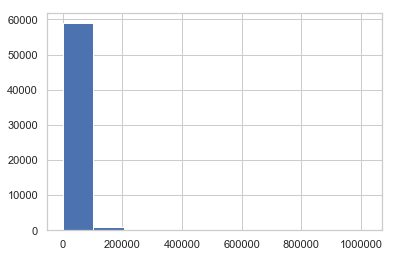

In [334]:
plt.hist(train['parking_price'])

# txn_floor

In [335]:
train['txn_floor'].describe()

count    44098.000000
mean         5.389269
std          3.944618
min          1.000000
25%          3.000000
50%          4.000000
75%          7.000000
max         28.000000
Name: txn_floor, dtype: float64

## 顯示50000筆資料中 有36790筆資料非遺漏值

(array([16900., 14294.,  5996.,  2896.,  2667.,   812.,   258.,   176.,
           80.,    19.]),
 array([ 1. ,  3.7,  6.4,  9.1, 11.8, 14.5, 17.2, 19.9, 22.6, 25.3, 28. ]),
 <a list of 10 Patch objects>)

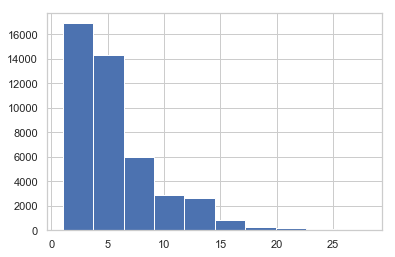

In [336]:
plt.hist(train['txn_floor'])

## 經由討論後我們認為樓層為遺漏值可能代表為獨棟，因此我們最終決定將其NA直轉為另一個特徵處理

In [337]:
train['txn_floor'] = train['txn_floor'].fillna('獨棟')

In [338]:
train['txn_floor'].describe()

count     60000
unique       29
top          獨棟
freq      15902
Name: txn_floor, dtype: object

# village_income_median

In [339]:
train['village_income_median'].describe()

count    58858.000000
mean       674.840175
std        140.653083
min        411.000000
25%        583.000000
50%        642.000000
75%        729.000000
max       1851.000000
Name: village_income_median, dtype: float64

## 顯示50000筆資料中 有49055筆資料非遺漏值

(array([ 7243., 32894., 13460.,  3685.,   948.,   267.,    67.,     0.,
          171.,   123.]),
 array([ 411.,  555.,  699.,  843.,  987., 1131., 1275., 1419., 1563.,
        1707., 1851.]),
 <a list of 10 Patch objects>)

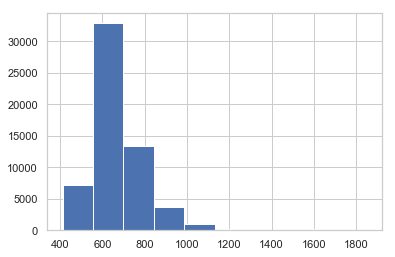

In [340]:
plt.hist(train['village_income_median'])

# 以眾數填入


In [341]:
train['village_income_median'] = train['village_income_median'].fillna(train['village_income_median'].median())

(array([ 7243., 34036., 13460.,  3685.,   948.,   267.,    67.,     0.,
          171.,   123.]),
 array([ 411.,  555.,  699.,  843.,  987., 1131., 1275., 1419., 1563.,
        1707., 1851.]),
 <a list of 10 Patch objects>)

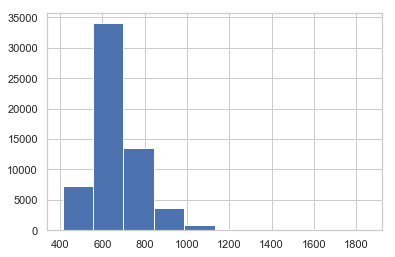

In [342]:
plt.hist(train['village_income_median'])

In [343]:
train['village_income_median'].describe()

count    60000.000000
mean       674.215117
std        139.380337
min        411.000000
25%        584.000000
50%        642.000000
75%        728.000000
max       1851.000000
Name: village_income_median, dtype: float64

# 在train_data 上執行的資料在test_data要執行相同的動作

## parking_area

In [344]:
#test = test.drop('parking_area',axis=1)

## parking_price

In [345]:
#test["parking_price"] = test["parking_price"].fillna(0)

## txn_floor

In [346]:
#test['txn_floor'] = test['txn_floor'].fillna('獨棟')

## village_income_median

In [347]:
#test['village_income_median'] = test['village_income_median'].fillna(test['village_income_median'].median())

## 將類別變數做one_hot_encoding

# 用人工的方式找出類別變數有

##  'building_material','city','building_type','building_use','parking_way','town','village', 'txn_floor'

##  我們將city town village 組合成address

In [348]:
list_dummy = ["building_material", 'building_type', 'building_use', 'parking_way','address','txn_floor']

In [349]:
df = pd.DataFrame()
col = []
for i  in list_dummy :
    #store = pd.get_dummies(train[i], prefix=i)
    #store1 = pd.concat([a,store],axis=1)
    #a = store1
    col.append( pd.get_dummies(train[i], prefix=i))

In [350]:
store =pd.concat(col,axis=1)

train_full = pd.concat([train,store],axis=1)

In [351]:
train_full.drop(list_dummy, axis=1,inplace=True)

In [352]:
train_full.drop(['town','city','village'],axis=1,inplace=True)

In [353]:
train_full.head()

,building_id,txn_dt,total_floor,building_complete_dt,parking_price,land_area,building_area,lat,lon,village_income_median,...,txn_floor_20.0,txn_floor_21.0,txn_floor_22.0,txn_floor_23.0,txn_floor_24.0,txn_floor_25.0,txn_floor_26.0,txn_floor_27.0,txn_floor_28.0,txn_floor_獨棟
0,e3mMIMR3JJqCaXz1,18674,4,6271,0.00000,18.144460,3.418175,-39.14,117.08,572.0,...,0,0,0,0,0,0,0,0,0,0
1,LgwzgklNvy4QCtq5,18800,5,7885,0.00000,11.387227,4.041309,-37.66,119.28,550.0,...,0,0,0,0,0,0,0,0,0,0
2,ucIR2NLLsC3T650L,19289,4,6028,0.00000,21.426802,5.584279,-37.67,119.29,625.0,...,0,0,0,0,0,0,0,0,0,0
3,jre1pJhcQj91Kdky,20385,24,18325,81138.88976,11.387227,13.563031,-39.13,117.09,950.0,...,0,0,0,0,0,0,0,0,0,0
4,rQpYpY9nRG7X5mmr,20657,2,6880,0.00000,61.306524,4.688108,-39.24,117.19,536.0,...,0,0,0,0,0,0,0,0,0,1


In [354]:
#train_id = train_full.iloc[:,1]
#train_full = train_full.iloc[:,1:]

In [355]:
train_full.head()

,building_id,txn_dt,total_floor,building_complete_dt,parking_price,land_area,building_area,lat,lon,village_income_median,...,txn_floor_20.0,txn_floor_21.0,txn_floor_22.0,txn_floor_23.0,txn_floor_24.0,txn_floor_25.0,txn_floor_26.0,txn_floor_27.0,txn_floor_28.0,txn_floor_獨棟
0,e3mMIMR3JJqCaXz1,18674,4,6271,0.00000,18.144460,3.418175,-39.14,117.08,572.0,...,0,0,0,0,0,0,0,0,0,0
1,LgwzgklNvy4QCtq5,18800,5,7885,0.00000,11.387227,4.041309,-37.66,119.28,550.0,...,0,0,0,0,0,0,0,0,0,0
2,ucIR2NLLsC3T650L,19289,4,6028,0.00000,21.426802,5.584279,-37.67,119.29,625.0,...,0,0,0,0,0,0,0,0,0,0
3,jre1pJhcQj91Kdky,20385,24,18325,81138.88976,11.387227,13.563031,-39.13,117.09,950.0,...,0,0,0,0,0,0,0,0,0,0
4,rQpYpY9nRG7X5mmr,20657,2,6880,0.00000,61.306524,4.688108,-39.24,117.19,536.0,...,0,0,0,0,0,0,0,0,0,1


## 去除離群值  ( 選擇Q3 *3 的位置)

In [241]:
Q3_list = np.percentile(a,75,axis=0)
Q1_list = np.percentile(a,25,axis=0)
dif_q = Q3_list - Q1_list

In [243]:
mask_top = a < (Q3_list + 2*dif_q)
mask_buttom = a > (Q1_list - 2*dif_q)

# 將整理完的檔案輸出成CSV檔

In [356]:
train_full.to_csv('clean_train.csv')